In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# 设置图片和标签的路径
img_dir = "./data/data/images"
label_dir = "./data/data/labels"

def parse_labels(label_path):
    # 打开标签文件，准备读取边界框数据
    with open(label_path, 'r') as file:
        boxes = []  # 初始化一个列表来存储所有的边界框数据

        # 逐行读取文件内容
        for line in file.readlines():
            # 去除每行的首尾空白符并分割，获取标签和边界框坐标
            parts = line.strip().split()
            class_label = int(parts[0])  # 第一部分是类别标签，转换为整数
            x_center = float(parts[1])   # 第二部分是边界框中心的x坐标，转换为浮点数
            y_center = float(parts[2])   # 第三部分是边界框中心的y坐标，转换为浮点数
            width = float(parts[3])      # 第四部分是边界框的宽度，转换为浮点数
            height = float(parts[4])     # 第五部分是边界框的高度，转换为浮点数

            # 将解析的数据作为一个元组添加到列表中
            boxes.append((class_label, x_center, y_center, width, height))
    
    # 返回包含所有边界框数据的列表
    return boxes


# 显示图像及其对应的标签
def show_images(images, labels, num_imgs=4):
    # 创建足够大的画布来显示多张图片
    fig, axs = plt.subplots(1, num_imgs, figsize=(15, 15))

    for i in range(num_imgs):
        # 构建图像和标签的完整路径
        img_path = os.path.join(img_dir, images[i])
        label_path = os.path.join(label_dir, labels[i])
        
        # 打开图像文件
        img = Image.open(img_path)
        img_width, img_height = img.size
        
        # 显示图像
        if num_imgs != 1:
            axs[i].imshow(img)
            axs[i].axis('off')  # 关闭坐标轴
        else:
            axs.imshow(img)
            axs.axis('off')

        # 打印图像尺寸，用于调试
        print(f"Image {i} - Path: {img_path}, Width: {img_width}, Height: {img_height}")

        # 解析标签文件，获取边界框信息
        boxes = parse_labels(label_path)
        for box in boxes:
            class_label, x_center, y_center, width, height = box
            
            # 将中心点坐标和尺寸转换为图像的像素尺度
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            
            # 计算边界框的左上角坐标
            x_upper_left = x_center - width / 2
            y_upper_left = y_center - height / 2

            # 创建矩形表示边界框
            rect = patches.Rectangle((x_upper_left, y_upper_left), width, height,
                                     linewidth=1, edgecolor='r', facecolor='none')
            if num_imgs != 1:
                axs[i].add_patch(rect)
                
                # 在边界框上显示类别标签
                axs[i].text(x_center, y_center, str(class_label), color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
            else:
                axs.add_patch(rect)
                axs.text(x_center, y_center, str(class_label), color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
            # 打印边界框和类别信息，用于调试
            print(f"Box - Class: {class_label}, X_center: {x_center}, Y_center: {y_center}, Width: {width}, Height: {height}")

    # 显示绘制好的图像和标签
    plt.show()



['2010_003970.jpg', '2008_006481.jpg', '2010_002714.jpg', '006335.jpg']
['2010_003970.txt', '2008_006481.txt', '2010_002714.txt', '006335.txt']
Image 0 - Path: ./data/data/images/2010_003970.jpg, Width: 500, Height: 375
Box - Class: 9, X_center: 196.0, Y_center: 191.0, Width: 390.0, Height: 368.0
Box - Class: 9, X_center: 283.50000000000006, Y_center: 274.5, Width: 337.0, Height: 198.99999999999997
Image 1 - Path: ./data/data/images/2008_006481.jpg, Width: 500, Height: 303
Box - Class: 2, X_center: 214.5, Y_center: 99.0, Width: 29.0, Height: 76.0
Box - Class: 3, X_center: 199.5, Y_center: 246.00000000000003, Width: 27.0, Height: 34.0
Image 2 - Path: ./data/data/images/2010_002714.jpg, Width: 500, Height: 375
Box - Class: 10, X_center: 250.5, Y_center: 288.5, Width: 499.0, Height: 173.0
Box - Class: 14, X_center: 272.0, Y_center: 160.5, Width: 370.0, Height: 219.0
Box - Class: 14, X_center: 150.5, Y_center: 113.49999999999999, Width: 53.0, Height: 121.0
Image 3 - Path: ./data/data/image

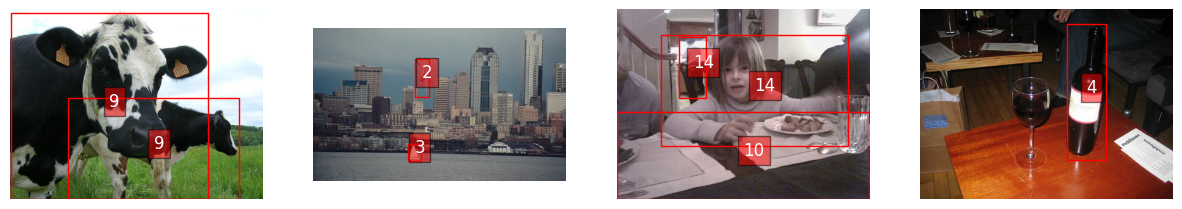

Image 0 - Path: ./data/data/images/000038.jpg, Width: 500, Height: 375
Box - Class: 1, X_center: 219.0, Y_center: 212.0, Width: 120.0, Height: 68.0
Box - Class: 13, X_center: 22.0, Y_center: 275.0, Width: 42.0, Height: 80.0
Box - Class: 14, X_center: 226.5, Y_center: 175.5, Width: 69.0, Height: 129.0


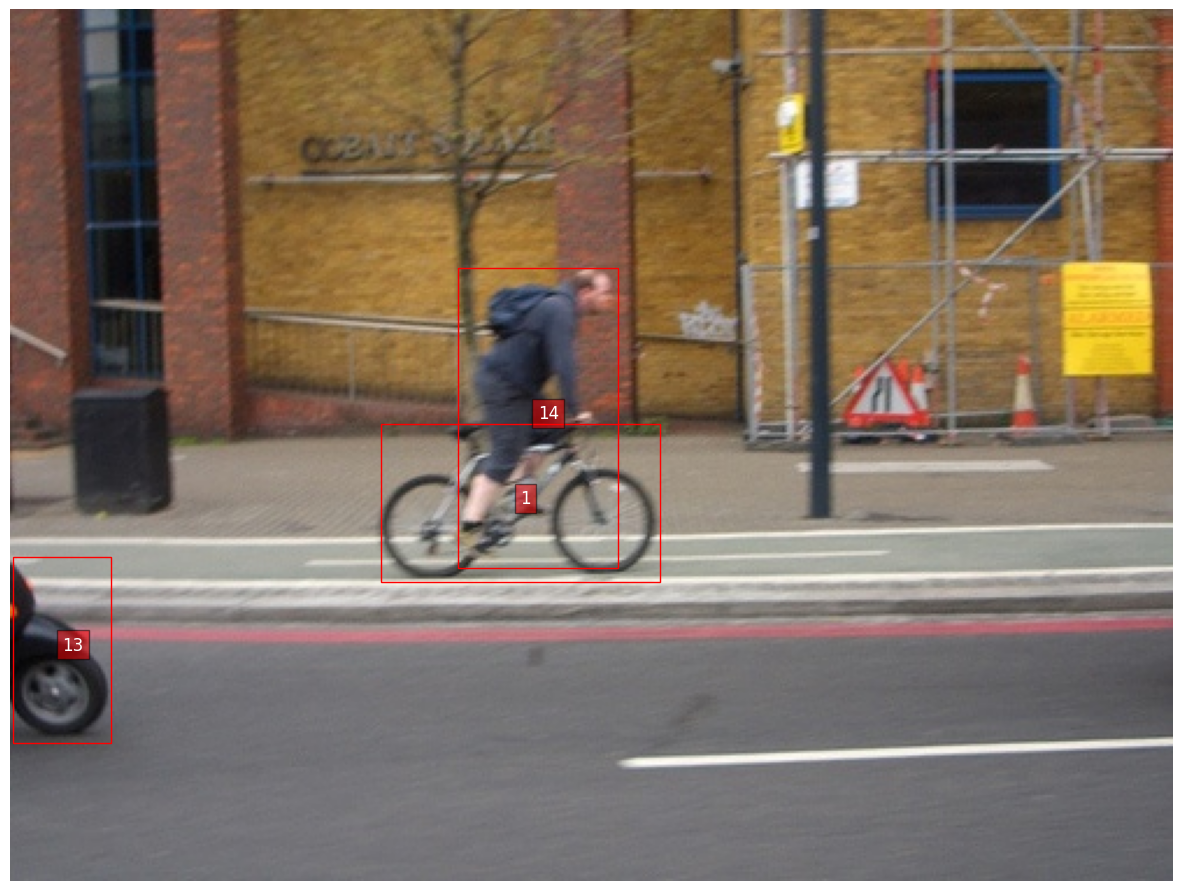

In [17]:
# 随机选择图像

import pandas as pd
# 加载数据
df = pd.read_csv('data/train.csv', header=None, names=['image', 'label'])

num_imgs = 4
selected_rows = df.sample(n=num_imgs)
selected_images = selected_rows['image'].tolist()
selected_labels = selected_rows['label'].tolist()

print(selected_images)
print(selected_labels)
show_images(selected_images, selected_labels, num_imgs)
show_images(['000038.jpg'], ['000038.txt'], 1)

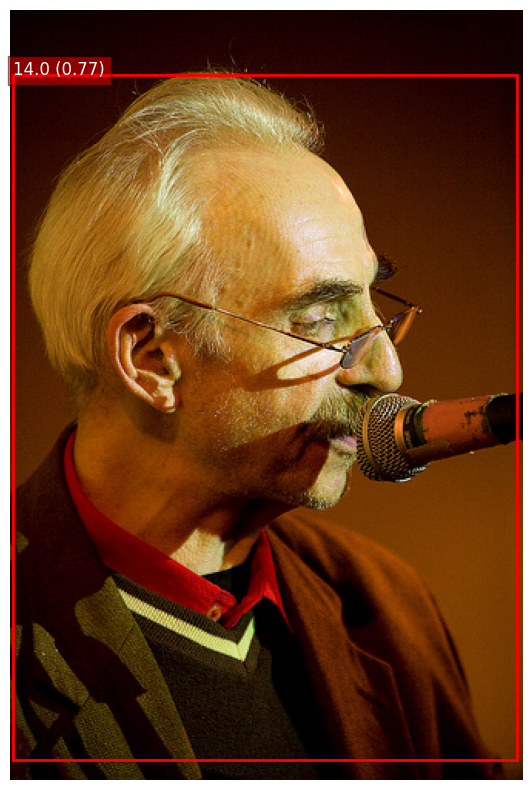

Image 0 - Path: ./data/data/images/2009_004285.jpg, Width: 333, Height: 500
Box - Class: 14, X_center: 161.5, Y_center: 269.5, Width: 321.0, Height: 461.0


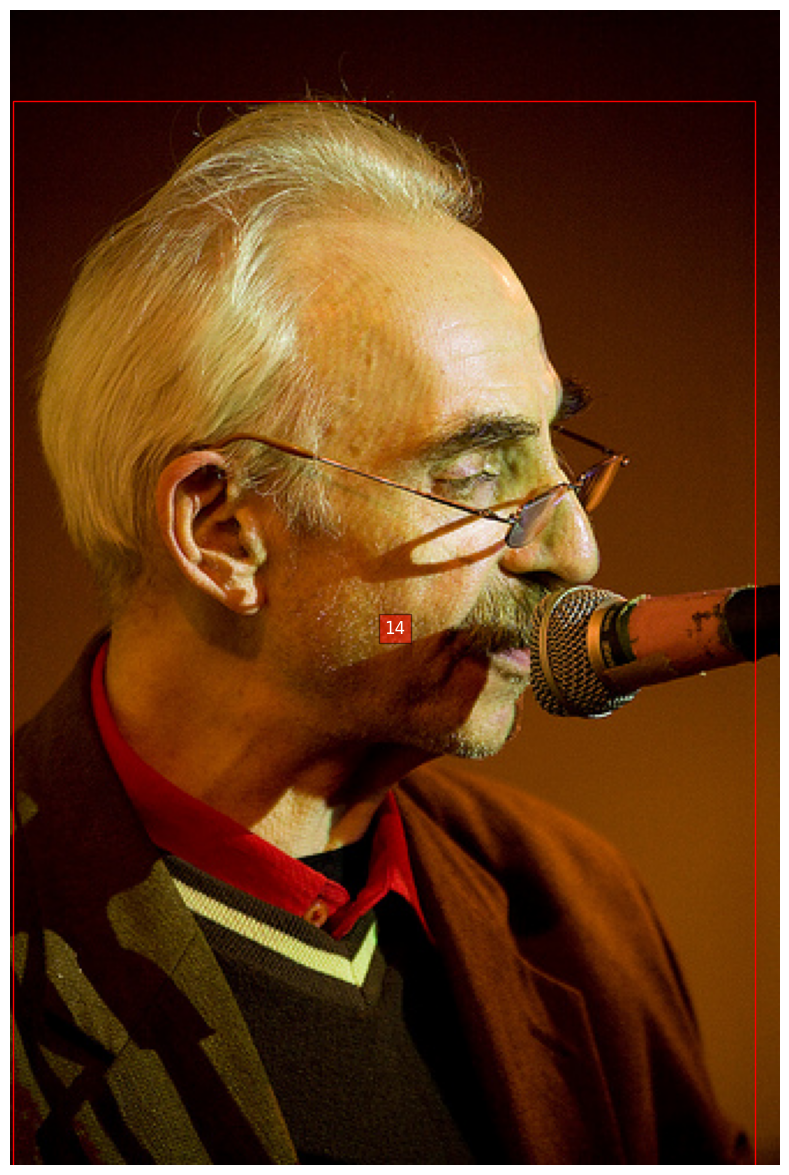

In [15]:
import torch
from model import Yolov1
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from utils import *

# 设定设备
device = "cuda" if torch.cuda.is_available() else "cpu"

# 加载模型
def load_model(checkpoint_path):
    model = Yolov1(split_size=7, num_boxes=2, num_classes=20)
    checkpoint = torch.load(checkpoint_path)
    # 恢复模型和优化器的状态
    model.load_state_dict(checkpoint['state_dict'])
    model = model.to(device)
    model.eval()
    return model

# 图像预处理
def transform_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((448, 448)),
        transforms.ToTensor(),
    ])
    original_image = Image.open(image_path)  # 保留原始图像用于显示
    image = transform(original_image).unsqueeze(0)
    return image.to(device), original_image


def predict(model, image_tensor, original_image):
    with torch.no_grad():
        predictions = model(image_tensor)
        bboxes = cellboxes_to_boxes(predictions)  # 转换预测结果为边界框
        bboxes = non_max_suppression(bboxes[0], iou_threshold=0.5, threshold=0.4, box_format="midpoint")  # 应用NMS
        plot_image_with_labels(original_image, bboxes)  # 绘制边界框和类别标签

def plot_image_with_labels(image, boxes):
    img = np.array(image)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    ax = plt.gca()

    img_width, img_height = image.size
    
    for box in boxes:
        class_label = box[0]  # 类别标签
        prob_score = box[1]   # 置信度
        if prob_score >= 1:
            prob_score = 1.00
        x_mid, y_mid, width, height = box[2:6]

        # 转换为原始图像尺寸的坐标
        x_mid *= img_width
        y_mid *= img_height
        width *= img_width
        height *= img_height
        upper_left_x = x_mid - width / 2
        upper_left_y = y_mid - height / 2

        rect = patches.Rectangle((upper_left_x, upper_left_y), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        label_text = f"{class_label} ({prob_score:.2f})"
        ax.text(upper_left_x, upper_left_y, label_text, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
    
    plt.axis('off')
    plt.show()


image = '2009_004285.jpg'
label = '2009_004285.txt'



model_path = 'res/epoch_50_checkpoint.pth.tar'
image_path = './data/data/images/' + image
label_path = './data/data/labels/' + label
model = load_model(model_path)
image_tensor, original_image = transform_image(image_path)  # 返回原始图像供绘制使用
predict(model, image_tensor, original_image)
show_images([image], [label], 1)